In [1]:
%pip install numpy

import numpy as np

# word embeddings (fake)
words = ["I", "love", "data"]
embeddings = np.array([
    [1, 0, 1],   # I
    [1, 1, 0],   # love
    [0, 1, 1]    # data
])

# Query, Key, Value = same (self-attention)
Q = embeddings
K = embeddings
V = embeddings

# Attention scores
scores = Q @ K.T

# Softmax
def softmax(x):
    e = np.exp(x - np.max(x))
    return e / e.sum(axis=1, keepdims=True)

weights = softmax(scores)

# Output
output = weights @ V

print("Attention Weights:\n", weights)
print("\nFinal Representations:\n", output)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 3.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
Attention Weights:
 [[0.57611688 0.21194156 0.21194156]
 [0.21194156 0.57611688 0.21194156]
 [0.21194156 0.21194156 0.57611688]]

Final Representations:
 [[0.78805844 0.42388312 0.78805844]
 [0.78805844 0.78805844 0.42388312]
 [0.42388312 0.78805844 0.78805844]]


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 3.1 MB/s eta 0:00:00
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 4.3 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 3.8 MB/s eta 0:00:0000:0100:01m
Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (362 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 3.7 MB/s eta 0:00:0000:0100:01
Using cached kiwisolver-1.4.9-cp31

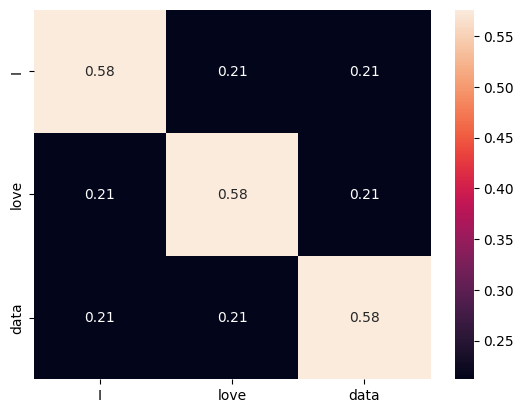

In [2]:

%pip install seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(weights, annot=True, xticklabels=words, yticklabels=words)
plt.show()


In [ ]:
 [[0.57611688 0.21194156 0.21194156]
 [0.21194156 0.57611688 0.21194156]
 [0.21194156 0.21194156 0.57611688]]

In [4]:
import boto3
import json
import numpy as np
from numpy.linalg import norm


In [5]:
client = boto3.client(
    service_name="bedrock-runtime",
    region_name="us-east-1"
)


In [6]:

def generate_embedding(input_text):
    
    # Set the model ID, e.g., Titan Text Embeddings V2.
    model_id = "amazon.titan-embed-text-v2:0"

    # Create the request for the model.
    native_request = {"inputText": input_text}

    # Convert the native request to JSON.
    request = json.dumps(native_request)

    # Invoke the model with the request.
    response = client.invoke_model(modelId=model_id, body=request)

    # Decode the model's native response body.
    model_response = json.loads(response["body"].read())

    # Extract and print the generated embedding and the input text token count.
    # embedding = np.array(model_response["embedding"])
    embedding = model_response["embedding"]

    input_token_count = model_response["inputTextTokenCount"]

    return embedding

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))



DEMO 1: SEMANTIC SEARCH (Keyword Search Killer)

In [ ]:
documents = [
    "AWS Bedrock provides foundation models for GenAI",
    "Amazon Bedrock is used to build AI-powered applications",
    "S3 is an object storage service",
    "EC2 provides scalable virtual servers",
    "I love playing football on weekends"
]


In [ ]:
query = "How can I build generative AI apps on AWS?"

In [ ]:
doc_embeddings = [generate_embedding(doc) for doc in documents]
query_embedding = generate_embedding(query)


In [ ]:
doc_embeddings

In [ ]:
query_embedding

In [ ]:
results = []

for doc, emb in zip(documents, doc_embeddings):
    score = cosine_similarity(query_embedding, emb)
    results.append((doc, score))

results = sorted(results, key=lambda x: x[1], reverse=True)

for doc, score in results:
    print(f"{score:.4f} → {doc}")


In [ ]:
query

In [ ]:
faqs = [
    "How do I reset my account password?",
    "What is the refund policy?",
    "How can I contact customer support?",
    "How do I update my billing details?"
]


In [ ]:
user_question = "I forgot my password. How can I get access again?"


In [ ]:
faq_embeddings = [generate_embedding(faq) for faq in faqs]
question_embedding = generate_embedding(user_question)


In [ ]:
best_match = None
best_score = -1

for faq, emb in zip(faqs, faq_embeddings):
    score = cosine_similarity(question_embedding, emb)
    if score > best_score:
        best_score = score
        best_match = faq

print("Best Match FAQ:")
print(best_match)
print("Similarity Score:", round(best_score, 4))


In [3]:
document = """
Employees are eligible for 20 days of paid leave annually.
Carry forward of leave is allowed up to 5 days.
Leave approval must be requested via the HR portal.
Unused leave expires after 2 years.

Health insurance covers spouse and two children.
Parents are not covered.
Insurance renewal happens every April.
"""


In [4]:
def fixed_chunking(text, chunk_size=80):
    return [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]

fixed_chunks = fixed_chunking(document)

for i, c in enumerate(fixed_chunks):
    print(f"\nChunk {i+1}:\n{c}")



Chunk 1:

Employees are eligible for 20 days of paid leave annually.
Carry forward of lea

Chunk 2:
ve is allowed up to 5 days.
Leave approval must be requested via the HR portal.


Chunk 3:
Unused leave expires after 2 years.

Health insurance covers spouse and two chil

Chunk 4:
dren.
Parents are not covered.
Insurance renewal happens every April.



In [5]:
def sentence_chunking(text):
    sentences = text.split(".")
    return [s.strip() + "." for s in sentences if s.strip()]

sentence_chunks = sentence_chunking(document)

for i, c in enumerate(sentence_chunks):
    print(f"\nChunk {i+1}:\n{c}")



Chunk 1:
Employees are eligible for 20 days of paid leave annually.

Chunk 2:
Carry forward of leave is allowed up to 5 days.

Chunk 3:
Leave approval must be requested via the HR portal.

Chunk 4:
Unused leave expires after 2 years.

Chunk 5:
Health insurance covers spouse and two children.

Chunk 6:
Parents are not covered.

Chunk 7:
Insurance renewal happens every April.


In [6]:
def semantic_chunking(sentences, chunk_size=2, overlap=1):
    chunks = []
    start = 0

    while start < len(sentences):
        end = start + chunk_size
        chunk = " ".join(sentences[start:end])
        chunks.append(chunk)
        start += chunk_size - overlap

    return chunks

sentences = sentence_chunking(document)
semantic_chunks = semantic_chunking(sentences)

for i, c in enumerate(semantic_chunks):
    print(f"\nChunk {i+1}:\n{c}")



Chunk 1:
Employees are eligible for 20 days of paid leave annually. Carry forward of leave is allowed up to 5 days.

Chunk 2:
Carry forward of leave is allowed up to 5 days. Leave approval must be requested via the HR portal.

Chunk 3:
Leave approval must be requested via the HR portal. Unused leave expires after 2 years.

Chunk 4:
Unused leave expires after 2 years. Health insurance covers spouse and two children.

Chunk 5:
Health insurance covers spouse and two children. Parents are not covered.

Chunk 6:
Parents are not covered. Insurance renewal happens every April.

Chunk 7:
Insurance renewal happens every April.


Why RAG exists ?

“LLMs are good at language, not truth.
RAG injects truth into the prompt.”

#### vector search with RDS postgres

In [9]:
import psycopg2
import json



conn = psycopg2.connect(
    host="vectordocumentdb.cluster-cedfajhbgrc5.us-east-1.rds.amazonaws.com",
    database="postgres",
    user="postgres",
    password="abcd1234",
    port=5432
)

cur = conn.cursor()

docs = [
    "AWS RDS PostgreSQL supports pgvector extension",
    "Vector search enables semantic similarity search",
    "Amazon Bedrock provides foundation models",
    "pgvector allows storing embeddings in PostgreSQL"
]

for d in docs:
    emb = generate_embedding(d)
    cur.execute(
        "INSERT INTO documents (content, embedding) VALUES (%s, %s)",
        (d, emb)
    )

conn.commit()
cur.close()
conn.close()


In [7]:
query = "How do I do semantic search in PostgreSQL?"
query_embedding = generate_embedding(query)


In [8]:
query_embedding

[-0.02550344355404377,
 0.02705235406756401,
 0.04219187796115875,
 0.012654663063585758,
 0.03608806058764458,
 0.003904895158484578,
 -0.007059096824377775,
 -0.07138374447822571,
 0.014142357744276524,
 -0.01836843229830265,
 0.022715728729963303,
 -0.0204608291387558,
 0.088507741689682,
 -0.005668863654136658,
 0.012768636457622051,
 -0.01532759889960289,
 0.0036026695743203163,
 -0.044036395847797394,
 0.05734831467270851,
 0.013963543809950352,
 0.03014775551855564,
 0.006459830794483423,
 -0.01628650538623333,
 0.04100784659385681,
 -0.029479622840881348,
 0.040764592587947845,
 0.04130425304174423,
 0.008811788633465767,
 -0.008825280703604221,
 0.054494552314281464,
 0.021108021959662437,
 -0.006910891272127628,
 0.012724739499390125,
 -0.026053577661514282,
 0.046259477734565735,
 0.022667400538921356,
 0.0544268935918808,
 0.03237486630678177,
 -0.04238599166274071,
 0.02361825294792652,
 -0.006568165961652994,
 0.023450111970305443,
 -0.0008813299355097115,
 0.050157930701

In [ ]:
conn = psycopg2.connect(
    host="vectordocumentdb.cluster-cedfajhbgrc5.us-east-1.rds.amazonaws.com",
    database="postgres",
    user="postgres",
    password="test1234",
    port=5432
)


cur = conn.cursor()

cur.execute("""
    SELECT content,
           embedding <-> %s::vector AS distance
    FROM documents
    ORDER BY distance
    LIMIT 4;
""", (query_embedding,))


results = cur.fetchall()

for r in results:
    print(r)

cur.close()
conn.close()

('pgvector allows storing embeddings in PostgreSQL', 0.9926760514498679)
('AWS RDS PostgreSQL supports pgvector extension', 1.0473334603854887)
('Vector search enables semantic similarity search', 1.0910516423591303)


In [14]:
query_text = "How does PostgreSQL support vector search?"

query_embedding = generate_embedding(query_text)

print(len(query_embedding))  # should print 1024


1024


In [20]:
from opensearchpy import OpenSearch, RequestsHttpConnection
import boto3
from requests_aws4auth import AWS4Auth
import numpy as np

# ---- Setup AWS Auth ----
session = boto3.Session()
credentials = session.get_credentials()
region = 'us-east-1'

awsauth = AWS4Auth(credentials.access_key,
                   credentials.secret_key,
                   region,
                   'aoss',
                   session_token=credentials.token)

# ---- Connect to Serverless Collection ----
host = 'https://5mz690z0qz1ivzufwhml.us-east-1.aoss.amazonaws.com'

client = OpenSearch(
    hosts=[{'host': host, 'port': 443}],
    http_auth=awsauth,
    use_ssl=True,
    verify_certs=True,
    connection_class=RequestsHttpConnection
)

# ---- Create Index ----
index_name = 'movies-index'
index_body = {
    "mappings": {
        "properties": {
            "title": {"type": "keyword"},
            "genre": {"type": "keyword"},
            "embedding": {"type": "dense_vector", "dims": 3}
        }
    }
}

client.indices.create(index=index_name, body=index_body, ignore=400)

# ---- Index Sample Movies ----
movies = [
    {"title": "The Matrix", "genre": "Sci-Fi", "embedding": np.random.rand(3).tolist()},
    {"title": "Inception", "genre": "Sci-Fi", "embedding": np.random.rand(3).tolist()},
    {"title": "Titanic", "genre": "Romance", "embedding": np.random.rand(3).tolist()},
    {"title": "The Notebook", "genre": "Romance", "embedding": np.random.rand(3).tolist()}
]

for i, movie in enumerate(movies):
    client.index(index=index_name, id=i, body=movie)

# ---- Vector Search ----
query_vector = np.random.rand(3).tolist()
search_body = {
    "size": 2,
    "query": {
        "knn": {
            "embedding": {
                "vector": query_vector,
                "k": 2
            }
        }
    }
}

response = client.search(index=index_name, body=search_body)

print("Top 2 similar movies:")
for hit in response['hits']['hits']:
    print(f"{hit['_source']['title']} - Score: {hit['_score']}")


InvalidURL: Failed to parse: https://[https://5mz690z0qz1ivzufwhml.us-east-1.aoss.amazonaws.com]:443/movies-index

In [1]:
from opensearchpy import OpenSearch, RequestsHttpConnection
from requests_aws4auth import AWS4Auth
import boto3
import numpy as np

# ---- AWS Auth ----
region = "us-east-1"
service = "aoss"  # use 'aoss' for OpenSearch Serverless or 'es' for regular OpenSearch


session = boto3.Session(profile_name="default")  # or your profile
credentials = session.get_credentials().get_frozen_credentials()

awsauth = AWS4Auth(
    credentials.access_key,
    credentials.secret_key,
    region,
    service,
    session_token=credentials.token
)


# ---- OpenSearch Endpoint ----
host = "5mz690z0qz1ivzufwhml.us-east-1.aoss.amazonaws.com"

client = OpenSearch(
    hosts=[{"host": host, "port": 443}],
    http_auth=awsauth,
    use_ssl=True,
    verify_certs=True,
    connection_class=RequestsHttpConnection
)

# ---- Create Index ----
index_name = "movies-index"
index_body = {
    "mappings": {
        "properties": {
            "title": {"type": "text"},
            "genre": {"type": "keyword"},
            "embedding": {"type": "dense_vector", "dims": 3}
        }
    }
}

client.indices.create(index=index_name, body=index_body, ignore=400)

# ---- Index Sample Movies ----
movies = [
    {"title": "The Matrix", "genre": "Sci-Fi", "embedding": np.random.rand(3).tolist()},
    {"title": "Inception", "genre": "Sci-Fi", "embedding": np.random.rand(3).tolist()},
    {"title": "Titanic", "genre": "Romance", "embedding": np.random.rand(3).tolist()},
    {"title": "The Notebook", "genre": "Romance", "embedding": np.random.rand(3).tolist()}
]

for movie in movies:
    client.index(index=index_name, body=movie)

print("Movies indexed successfully!")


AuthorizationException: AuthorizationException(403, 'Forbidden')

In [ ]:
# Install required libraries if not already installed
# !pip install opensearch-py boto3 requests-aws4auth numpy --quiet

# ---------------------------------------
# Step 1: Imports and AWS Authentication
# ---------------------------------------
import boto3
from opensearchpy import OpenSearch, RequestsHttpConnection
from requests_aws4auth import AWS4Auth
import numpy as np

# Your AWS region
region = "us-east-1"

# Create a boto3 session (uses default credentials or environment variables)
session = boto3.Session()
credentials = session.get_credentials().get_frozen_credentials()

awsauth = AWS4Auth(
    credentials.access_key,
    credentials.secret_key,
    region,
    "aoss",
    session_token=credentials.token
)

# ---------------------------------------
# Step 2: OpenSearch Endpoint
# ---------------------------------------
# Replace this with your collection endpoint from AOSS console
host = "https://search-movies-xxxxxxxx.us-east-1.aoss.amazonaws.com"

client = OpenSearch(
    hosts=[host],
    http_auth=awsauth,
    use_ssl=True,
    verify_certs=True,
    connection_class=RequestsHttpConnection
)

# ---------------------------------------
# Step 3: Define Index Name
# ---------------------------------------
index_name = "movies"  # Must match your collection's index permissions

# ---------------------------------------
# Step 4: Create Sample Documents
# ---------------------------------------
movies = [
    {"title": "The Matrix", "genre": "Sci-Fi", "rating": 8.7},
    {"title": "Inception", "genre": "Sci-Fi", "rating": 8.8},
    {"title": "Titanic", "genre": "Romance", "rating": 7.8},
    {"title": "The Notebook", "genre": "Romance", "rating": 7.9}
]

# Insert documents
for i, movie in enumerate(movies):
    response = client.index(index=index_name, id=i+1, body=movie)
    print(f"Indexed document {i+1}: {response['result']}")

# ---------------------------------------
# Step 5: Refresh the index (make documents searchable)
# ---------------------------------------
client.indices.refresh(index=index_name)

# ---------------------------------------
# Step 6: Query the Index
# ---------------------------------------
query_body = {
    "query": {
        "match": {
            "genre": "Sci-Fi"
        }
    }
}

response = client.search(index=index_name, body=query_body)
print("\nSearch Results:")
for hit in response['hits']['hits']:
    print(hit['_source'])


AuthorizationException: AuthorizationException(403, 'Forbidden')